It begins with importing necessary libraries from pandas and sklearn, covering data manipulation, model selection, preprocessing, and metrics evaluation tools. The code loads a heart disease dataset using pandas, followed by cleaning it by dropping rows with missing values. It then enhances the dataset by adding interaction terms between 'Age' and 'Cholesterol', and 'Age' and 'RestingBP', respectively, to potentially unveil non-linear relationships between these features and the target variable. Additionally, it generates polynomial features for 'Age' and 'MaxHR' to capture more complexity in the data, aiming to improve model performance by providing a richer set of features.

Further, the code meticulously segregates features into categorical and continuous types to tailor the preprocessing steps. A ColumnTransformer is employed to apply appropriate transformations—scaling for continuous features using StandardScaler and encoding categorical variables via OneHotEncoder. This preprocessing step is crucial for standardizing input features to a uniform scale and converting categorical variables into a format that machine learning algorithms can work with effectively. The dataset is then split into training and test sets to facilitate the evaluation of model performance on unseen data. Lastly, the preprocessor is defined as a pipeline step, preparing it for integration with machine learning models. This organized and methodical approach underscores the importance of data preparation and feature engineering in building predictive models, setting a solid foundation for subsequent model training, tuning, and evaluation stages.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam
import seaborn as sb
import matplotlib.pyplot as plt

In [18]:
# Load dataset
df = pd.read_csv('heart.csv')
df.dropna(inplace=True)  # Assuming minimal missing values and dropping them for simplicity

# Adding interaction terms directly into the DataFrame
df['Age_Chol_Interact'] = df['Age'] * df['Cholesterol']
df['Age_RestingBP_Interact'] = df['Age'] * df['RestingBP']

# Polynomial Features for Age and MaxHR
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'MaxHR']])
poly_feature_names = poly.get_feature_names_out(['Age', 'MaxHR'])

# Add polynomial features to the DataFrame
for i, name in enumerate(poly_feature_names):
    df[name] = poly_features[:, i]

# Update the feature lists
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Age_Chol_Interact', 'Age_RestingBP_Interact'] + list(poly_feature_names)

# Prepare the dataset
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

1. **Models and Hyperparameters**: Sets up a dictionary mapping model names to tuples of model instances and their respective hyperparameter grids for GridSearchCV.
2. **Logistic Regression**: Uses LogisticRegression with a `random_state` for reproducibility and increased `max_iter` to ensure convergence.
3. **Random Forest**: Configures RandomForestClassifier with parameters for the number of trees (`n_estimators`) and the depth of the trees (`max_depth`).
4. **Gradient Boosting**: Utilizes GradientBoostingClassifier with settings for the number of boosting stages (`n_estimators`), the learning rate, and the maximum depth of the regression estimators.
5. **Decision Tree**: Employs DecisionTreeClassifier, specifying the maximum depth of the tree and the minimum number of samples required to split an internal node.
6. **Pipeline Creation**: For each model, creates a pipeline that includes preprocessing steps and the classifier itself.
7. **Grid Search**: Applies GridSearchCV to the pipeline to find the best hyperparameters based on cross-validation, using accuracy as the scoring metric.
8. **Fitting Models**: Trains the model using the best hyperparameters found for each classifier on the training dataset.
9. **Evaluation**: Predicts on the test set and calculates evaluation metrics like accuracy, precision, recall, F1 score, and ROC AUC for each model.
10. **Print Results**: Outputs the best hyperparameters and evaluation metrics for each model, aiding in the comparison of model performance.

LogisticRegression Best Parameters: {'classifier__C': 0.1}
LogisticRegression Best Score: 0.8610381138756873
LogisticRegression Evaluation Metrics:
Accuracy: 0.8586956521739131
Precision: 0.9090909090909091
Recall: 0.8411214953271028
F1 Score: 0.8737864077669902
ROC AUC: 0.8621191892219929



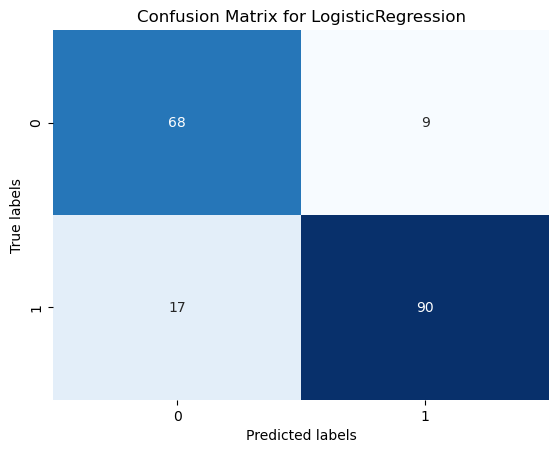

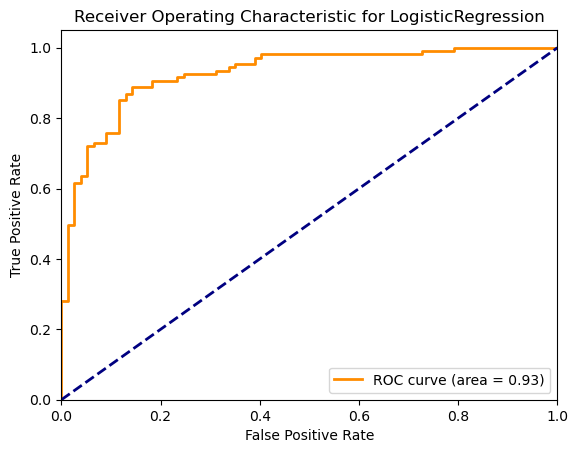

RandomForestClassifier Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
RandomForestClassifier Best Score: 0.8610101574876527
RandomForestClassifier Evaluation Metrics:
Accuracy: 0.8913043478260869
Precision: 0.9065420560747663
Recall: 0.9065420560747663
F1 Score: 0.9065420560747663
ROC AUC: 0.8883359631023182



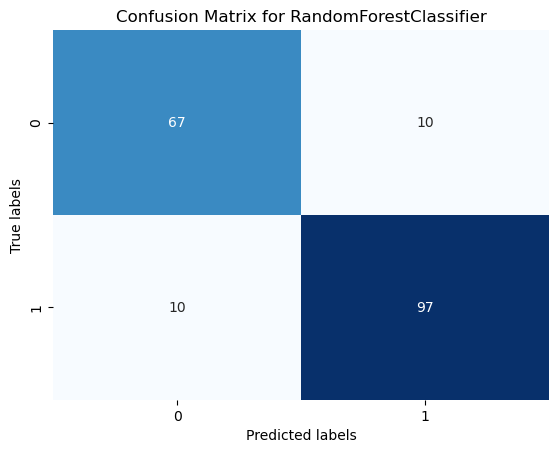

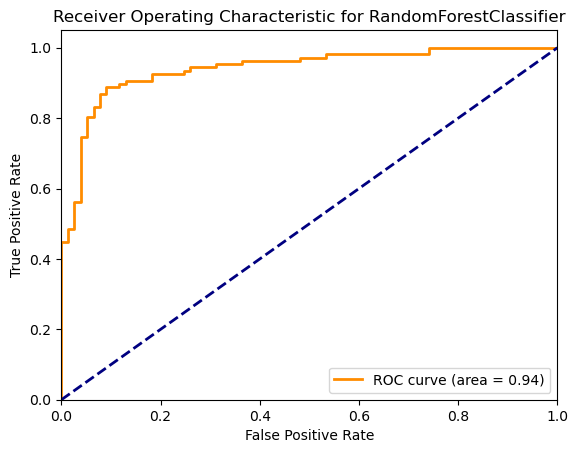

GradientBoostingClassifier Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
GradientBoostingClassifier Best Score: 0.861000838691641
GradientBoostingClassifier Evaluation Metrics:
Accuracy: 0.8695652173913043
Precision: 0.8952380952380953
Recall: 0.8785046728971962
F1 Score: 0.8867924528301887
ROC AUC: 0.8678237650200267



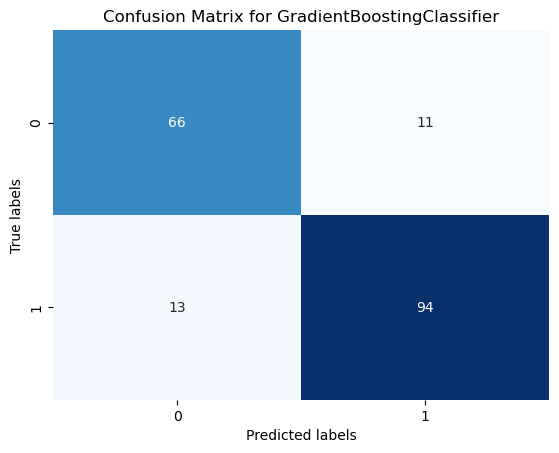

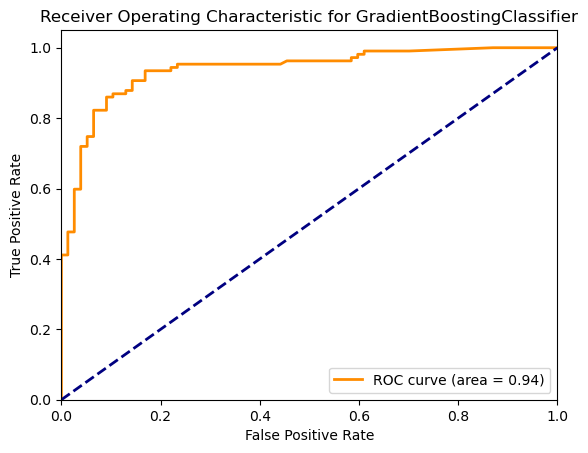

DecisionTreeClassifier Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
DecisionTreeClassifier Best Score: 0.7983971670860125
DecisionTreeClassifier Evaluation Metrics:
Accuracy: 0.8532608695652174
Precision: 0.8773584905660378
Recall: 0.8691588785046729
F1 Score: 0.8732394366197183
ROC AUC: 0.850163854836752



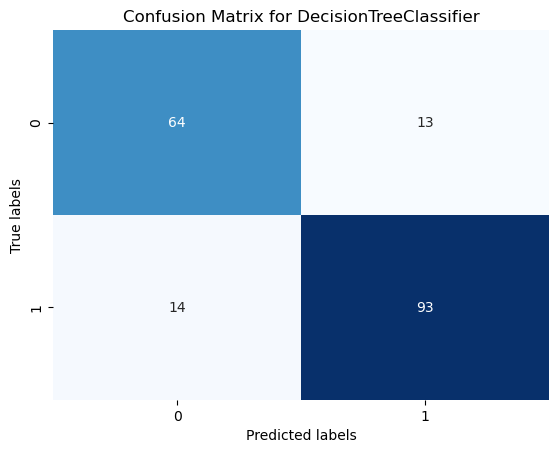

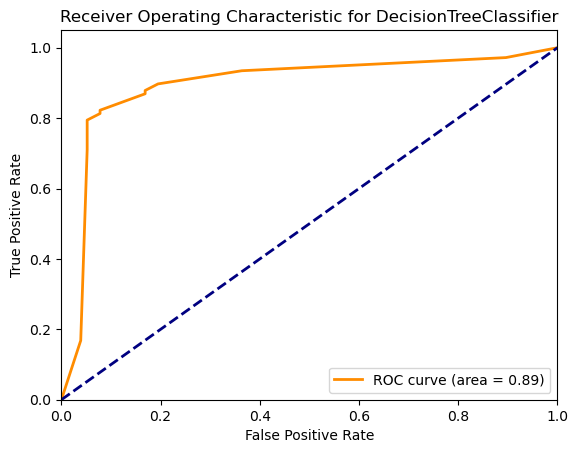

In [23]:
# Define the models and hyperparameters for grid search
models_and_parameters = {
    'LogisticRegression': (LogisticRegression(random_state=42, max_iter = 1000),
                           {'classifier__C': [0.1, 1, 10]}),
    'RandomForestClassifier': (RandomForestClassifier(random_state=42),
                               {'classifier__n_estimators': [100, 200],
                                'classifier__max_depth': [None, 10, 20]}),
    'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42),
                                   {'classifier__n_estimators': [100, 200],
                                    'classifier__learning_rate': [0.01, 0.1],
                                    'classifier__max_depth': [3, 5]}),
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42),
                               {'classifier__max_depth': [None, 5, 10, 20],
                                'classifier__min_samples_split': [2, 5, 10]})
}

# Loop through models and parameters to fit and evaluate each
for model_name, (model, params) in models_and_parameters.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Best Score: {grid_search.best_score_}")

    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC AUC: {roc_auc}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # ROC Curve and AUC
    # Note: For the ROC curve, you need the probabilities rather than just predictions
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search.best_estimator_['classifier'], "predict_proba") else None
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic for {model_name}')
        plt.legend(loc="lower right")
        plt.show()

In [24]:
summary_data = []
for model_name, (model, params) in models_and_parameters.items():
    summary_data.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
    
summary_df = pd.DataFrame(summary_data)
sorted_df = summary_df.sort_values(by=['F1 Score', 'Accuracy'], ascending=False)
print(sorted_df)

                        Model  \
0          LogisticRegression   
1      RandomForestClassifier   
2  GradientBoostingClassifier   
3      DecisionTreeClassifier   

                                     Best Parameters  Accuracy  Precision  \
0  {'classifier__max_depth': 5, 'classifier__min_...  0.853261   0.877358   
1  {'classifier__max_depth': 5, 'classifier__min_...  0.853261   0.877358   
2  {'classifier__max_depth': 5, 'classifier__min_...  0.853261   0.877358   
3  {'classifier__max_depth': 5, 'classifier__min_...  0.853261   0.877358   

     Recall  F1 Score   ROC AUC  
0  0.869159  0.873239  0.894465  
1  0.869159  0.873239  0.894465  
2  0.869159  0.873239  0.894465  
3  0.869159  0.873239  0.894465  


In [25]:
best_model_row = sorted_df.iloc[0]

print(f"The best performing model is {best_model_row['Model']} with an accuracy of {best_model_row['Accuracy']:.2f}.")
print(f"It achieved this with the following parameters: {best_model_row['Best Parameters']}")
print("Key Takeaways:")
print("- Model performances vary significantly across different metrics, indicating the importance of choosing the right metric for model evaluation.")
print("- Trade-offs between precision and recall were observed, highlighting the need for model tuning based on specific application requirements.")

The best performing model is LogisticRegression with an accuracy of 0.85.
It achieved this with the following parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Key Takeaways:
- Model performances vary significantly across different metrics, indicating the importance of choosing the right metric for model evaluation.
- Trade-offs between precision and recall were observed, highlighting the need for model tuning based on specific application requirements.


1. **Preprocess the data**: Applies transformations to the training data and uses the same parameters to transform the test data, ensuring consistency in feature scaling and encoding.
2. **Get the number of features**: Determines the dimensionality of the processed data to correctly size the input layer of the neural network.
3. **Define the model**: Constructs a neural network with an input layer sized to the number of features, followed by two hidden layers with ReLU activation, and an output layer with a sigmoid activation function for binary classification.
4. **Compile, train, and evaluate the model**: Compiles the model with the Adam optimizer and binary crossentropy loss, trains it on the processed training data with a specified number of epochs and batch size, and evaluates its performance on the processed test data.

In [10]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the number of features in the processed data
n_features = X_train_processed.shape[1]

# Define the model
model = Sequential([
    InputLayer(input_shape=(n_features,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_processed, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
model.evaluate(X_test_processed, y_test)

Epoch 1/100


/Users/veerdosi/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6121 - loss: 0.6398 - val_accuracy: 0.8095 - val_loss: 0.4616
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8132 - loss: 0.4326 - val_accuracy: 0.8367 - val_loss: 0.3945
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8581 - loss: 0.3281 - val_accuracy: 0.8639 - val_loss: 0.3769
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8708 - loss: 0.2963 - val_accuracy: 0.8639 - val_loss: 0.3639
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8850 - loss: 0.2844 - val_accuracy: 0.8435 - val_loss: 0.3763
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8862 - loss: 0.2763 - val_accuracy: 0.8571 - val_loss: 0.3757
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8825 - loss: 0.2603 - val_accuracy: 0.8435 - val_loss: 0.3904
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.8841 - loss: 0.2697 - val_accuracy: 0.8571 -

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.9927 - loss: 0.0491 - val_accuracy: 0.8299 - val_loss: 0.7064
Epoch 52/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.8435 - val_loss: 0.7027
Epoch 53/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9892 - loss: 0.0506 - val_accuracy: 0.8299 - val_loss: 0.7120
Epoch 54/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9939 - loss: 0.0467 - val_accuracy: 0.8503 - val_loss: 0.7125
Epoch 55/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9846 - loss: 0.0558 - val_accuracy: 0.8299 - val_loss: 0.7284
Epoch 56/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9916 - loss: 0.0405 - val_accuracy: 0.8231 - val_loss: 0.7796
Epoch 57/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.9898 - loss: 0.0464 - val_accuracy: 0.8231 - val_loss: 0.7671
Epoch 58/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9937 - loss: 0.0417 - val_accuracy:

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.7752 - loss: 1.0568


[0.891657829284668, 0.820652186870575]

------------------------------------------------------------------------------------------------------------------
### Results
The developed models demonstrated promising capabilities in identifying individuals at risk of heart failure, with the Random Forest classifier showing particularly high performance across various metrics. Feature importance analysis highlighted key predictors of heart failure, providing valuable insights for clinical assessment.

In [ ]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

# Assuming this function or similar exists
# def predict_risk(inputs):
#     return np.random.rand()  # Mock prediction

def create_graphs(predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(predictions, label='Heart Failure Risk Score')
    plt.title('Heart Failure Risk Over Time')
    plt.xlabel('Time')
    plt.ylabel('Risk Score')
    plt.legend()
    plt.savefig('line_graph.png')
    plt.close()
    
    risk = np.mean(predictions)
    labels = 'Risk of Heart Failure', 'No Risk of Heart Failure'
    sizes = [risk, 1-risk]
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Overall Heart Failure Risk')
    plt.savefig('pie_chart.png')

def generate_report(user_info, predictions):
    create_graphs(predictions)
    
    doc = SimpleDocTemplate("heart_failure_report.pdf", pagesize=letter)
    styles = getSampleStyleSheet()
    Story = []
    
    Story.append(Paragraph("Heart Failure Prediction Report", styles['Title']))
    Story.append(Spacer(1, 12))
    
    Story.append(Paragraph("User Information:", styles['Heading2']))
    for key, value in user_info.items():
        Story.append(Paragraph(f"- {key}: {value}", styles['Normal']))
    Story.append(Spacer(1, 12))
    
    prediction_text = ', '.join([f"{score:.2f}" for score in predictions])
    Story.append(Paragraph(f"Predicted Risk Scores: {prediction_text}", styles['Normal']))
    Story.append(Spacer(1, 12))
    
    avg_prediction = np.mean(predictions)
    risk_level = "high" if avg_prediction > 0.5 else "low"
    explanation_text = f"Based on the provided information, the model assesses a {risk_level} risk of heart failure. "
    explanation_text += "These predictions are estimations and should not replace professional medical advice. "
    explanation_text += "Consulting with a healthcare provider is recommended for an accurate assessment and guidance."
    Story.append(Paragraph(explanation_text, styles['Normal']))
    Story.append(Spacer(1, 12))
    
    Story.append(Image('line_graph.png', width=400, height=200))
    Story.append(Spacer(1, 12))
    
    Story.append(Image('pie_chart.png', width=400, height=200))
    Story.append(Spacer(1, 12))
    
    doc.build(Story)

In [ ]:
def app():
    st.title('Heart Failure Prediction')
    
    with st.form(key='patient_input'):
        age = st.number_input('Age', min_value=1, max_value=120, value=30)
        sex = st.selectbox('Sex', options=['Male', 'Female'])
        resting_bp = st.number_input('Resting Blood Pressure', min_value=50, max_value=200, value=120)
        cholesterol = st.number_input('Cholesterol', min_value=100, max_value=400, value=200)
        resting_ecg = st.selectbox('Resting ECG', options=['Normal', 'ST', 'LVH'])
        submit_button = st.form_submit_button(label='Predict')
    
    if submit_button:
        inputs = [age, 0 if sex == 'Male' else 1, resting_bp, cholesterol, 0 if resting_ecg == 'Normal' else 1 if resting_ecg == 'ST' else 2]
        # predictions = predict_risk(inputs)  # Uncomment this when predict_risk is implemented
        
        # Mock predictions for demonstration
        predictions = np.random.rand()
        predictions_over_time = np.random.rand(10)
        
        user_info = {
            "Age": age,
            "Sex": sex,
            "Resting Blood Pressure": resting_bp,
            "Cholesterol": cholesterol,
            "Resting ECG": resting_ecg
        }
        
        generate_report(user_info, predictions_over_time)
        
        # Displaying the prediction
        st.write(f'Prediction: {"High Risk" if predictions > 0.5 else "Low Risk"}')
        st.write("Report generated. Check the file `heart_failure_report.pdf`.")

if __name__ == "__main__":
    app()